<a href="https://colab.research.google.com/github/jsuj1th/Colab/blob/main/DL/Assignments/DL_HW_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# #Ninad
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.datasets import mnist
# from tensorflow.keras.utils import to_categorical
# import matplotlib.pyplot as plt

# (x_train, y_train), (x_test, y_test) = mnist.load_data()

# x_train, x_test = x_train / 255.0, x_test / 255.0

# def create_mixed_dataset(x, y, label_pairs, num_pairs):
#     mixed_images = []
#     mixed_labels = []

#     for new_label, (label1, label2) in enumerate(label_pairs):
#         images1 = x[y == label1]
#         images2 = x[y == label2]

#         num_available_pairs = min(len(images1), len(images2), num_pairs)

#         indices1 = np.random.choice(len(images1), num_available_pairs, replace=False)
#         indices2 = np.random.choice(len(images2), num_available_pairs, replace=False)

#         mixed = (images1[indices1] + images2[indices2]) / 2.0

#         mixed_images.append(mixed)
#         mixed_labels.extend([new_label] * num_available_pairs)

#     return np.vstack(mixed_images), np.array(mixed_labels)

# label_pairs = [(0, 1), (2, 3), (4, 5), (6, 7), (8, 9)]

# x_train_mixed, y_train_mixed = create_mixed_dataset(x_train, y_train, label_pairs, 6000)
# x_test_mixed, y_test_mixed = create_mixed_dataset(x_test, y_test, label_pairs, 1000)

# print(f"New training set: {x_train_mixed.shape}, Labels: {y_train_mixed.shape}")
# print(f"New test set: {x_test_mixed.shape}, Labels: {y_test_mixed.shape}")


Regulariations mentioned in the codebook are
L1, L2,L1-L2, dropout

In [23]:
import keras
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()



In [24]:
import numpy as np
import random

# Function to pair and create "mixed" images
def create_mixed_images(label1_images, label2_images, num_pairs):
    mixed_images = []
    num_pairs = min(len(label1_images), len(label2_images), num_pairs)

    for i in range(num_pairs):
        img1 = label1_images[i]
        img2 = label2_images[i]
        # Average the two images to create a new "mixed" image
        mixed_image = ((img1 + img2) / 2).astype(np.uint8)
        mixed_images.append(mixed_image)

    return mixed_images

# Filter training and test images by label
train_images_by_label = {i: [] for i in range(10)}
test_images_by_label = {i: [] for i in range(10)}

for i, label in enumerate(train_labels):
    train_images_by_label[label].append(train_images[i])

for i, label in enumerate(test_labels):
    test_images_by_label[label].append(test_images[i])

# Label pairs to mix: (0,1), (2,3), (4,5), (6,7), (8,9)
label_pairs = [(0, 1), (2, 3), (4, 5), (6, 7), (8, 9)]

# Create the new dataset
new_train_images = []
new_train_labels = []
new_test_images = []
new_test_labels = []

for new_label, (label1, label2) in enumerate(label_pairs):
    # Create mixed training images
    mixed_train_images = create_mixed_images(train_images_by_label[label1], train_images_by_label[label2], 6000)
    mixed_test_images = create_mixed_images(test_images_by_label[label1], test_images_by_label[label2], 1000)

    # Append mixed images and labels to new dataset
    new_train_images.extend(mixed_train_images)
    new_train_labels.extend([new_label] * len(mixed_train_images))

    new_test_images.extend(mixed_test_images)
    new_test_labels.extend([new_label] * len(mixed_test_images))

# Convert to numpy arrays
new_train_images = np.array(new_train_images)
new_train_labels = np.array(new_train_labels)
new_test_images = np.array(new_test_images)
new_test_labels = np.array(new_test_labels)

print(f"New training dataset size: {new_train_images.shape}, New labels size: {new_train_labels.shape}")
print(f"New test dataset size: {new_test_images.shape}, New labels size: {new_test_labels.shape}")


num_classes = 5
train_labels_onehot = to_categorical(new_train_labels, num_classes)
test_labels_onehot = to_categorical(new_test_labels, num_classes)

New training dataset size: (29071, 28, 28), New labels size: (29071,)
New test dataset size: (4804, 28, 28), New labels size: (4804,)


In [25]:
print(new_test_images.shape)
# print(new_train_labels.shape)
# print(new_test_images.shape)
# print(new_test_labels.shape

(4804, 28, 28)


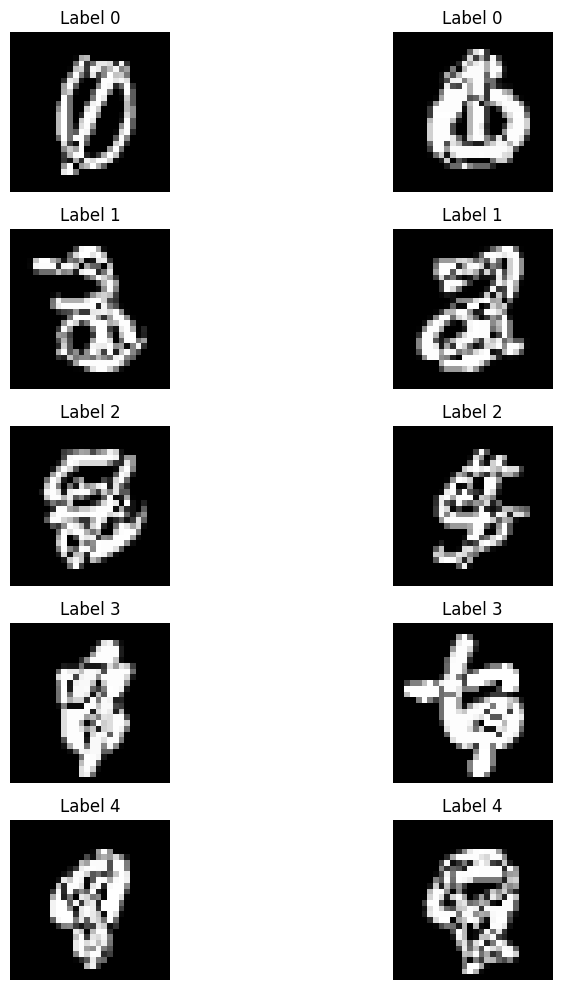

In [26]:
fig, axes = plt.subplots(5, 2, figsize=(10, 10))
for label in range(5):
    # Filter images of the current label
    label_images = new_train_images[new_train_labels == label]

    # Randomly select 2 images
    selected_images = random.sample(list(label_images), 2)

    for i in range(2):
        axes[label, i].imshow(selected_images[i], cmap='gray')
        axes[label, i].axis('off')
        axes[label, i].set_title(f"Label {label}")

plt.tight_layout()
plt.show()

In [27]:
# # prompt: print one image from combined_test_imgs and it's label

# import matplotlib.pyplot as plt

# # Assuming combined_test_imgs is defined as in the previous code
# # and contains a list of tuples (image, label)

# # Access the first image and its label
# first_image, first_label = combined_test_imgs[4500]

# # Display the image
# plt.imshow(first_image, cmap='gray')
# plt.title(f"Label: {first_label}")
# plt.show()


In [28]:
# label_groups = {}
# import random
# for combined_img, label_index in combined_train_imgs:
#     if label_index not in label_groups:
#         label_groups[label_index] = []
#     label_groups[label_index].append(combined_img)
# selected_images = {}
# for label_index, images in label_groups.items():
#     selected_images[label_index] = random.sample(images, min(2, len(images)))
# for label_index, images in selected_images.items():
#     print(f"Label {label_index}:")
#     for i, img in enumerate(images):
#         plt.imshow(img, cmap='gray')
#         plt.show()

In [29]:
# # (train_data, train_labels)=combined_imgs
# train_data=[]
# train_labels=[]
# for i in combined_train_imgs:
#   # print(len(i[0]))
#   train_data.append(i[0])
#   train_labels.append(i[1])
# train_data=np.array(train_data)
# train_data=train_data.reshape((29071, 28 * 28))
# train_labels=np.array(train_labels).reshape(29071,-1)
# num_classes = 5
# train_labels_onehot = to_categorical(train_labels, num_classes)
# print(train_data.shape)
# print(train_labels.shape)


# test_data=[]
# test_labels=[]
# for i in combined_test_imgs:
#   test_data.append(i[0])
#   test_labels.append(i[1])
# test_data=np.array(test_data)
# test_data=test_data.reshape((4814, 28 * 28))
# test_labels=np.array(test_labels).reshape(4814,-1)
# num_classes = 5
# test_labels_onehot = to_categorical(test_labels, num_classes)
# print(test_data.shape)
# print(test_labels.shape)

In [30]:
# print(new_train_labels.shape)
# print(new_train_images.shape)
# print(new_test_labels.shape)
# print(new_test_images.shape)
new_train_images=new_train_images.reshape(-1, 28, 28, 1)
new_test_images=new_test_images.reshape(-1, 28, 28, 1)
new_train_labels=to_categorical(new_train_labels)
new_test_labels=to_categorical(new_test_labels)
print(new_train_labels.shape)
print(new_train_images.shape)
print(new_test_labels.shape)
print(new_test_images.shape)

(29071, 5)
(29071, 28, 28, 1)
(4804, 5)
(4804, 28, 28, 1)


In [31]:
from sklearn.model_selection import train_test_split
x_train_mixed,x_val,y_train_mixed,y_val = train_test_split(new_train_images,new_train_labels,test_size=0.2,random_state=33)

In [32]:
from tensorflow.keras.regularizers import l1_l2, l2, l1
from tensorflow.keras import layers, models, optimizers
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),
    layers.Dense(64, activation="relu",
                 kernel_regularizer=l2( l2=0.01)),
    layers.Dropout(0.3),
    layers.Dense(64, activation="relu",
                 kernel_regularizer=l2( l2=0.01)),
    # layers.Dense(23, activation="softmax"),
    layers.Dense(5, activation="softmax")
])

# optimizer = optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer='adam',
              loss="categorical_crossentropy",
              metrics=["accuracy"])
ep=5
model_history=model.fit(new_train_images, new_train_labels,
          epochs=ep, batch_size=40,validation_data=(x_val,y_val))


Epoch 1/5
727/727 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5583 - loss: 6.6209 - val_accuracy: 0.8332 - val_loss: 1.4986
Epoch 2/5
727/727 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7926 - loss: 1.5427 - val_accuracy: 0.8929 - val_loss: 1.0494
Epoch 3/5
727/727 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8412 - loss: 1.1275 - val_accuracy: 0.9212 - val_loss: 0.7670
Epoch 4/5
727/727 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8739 - loss: 0.8495 - val_accuracy: 0.9178 - val_loss: 0.6224
Epoch 5/5
727/727 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8851 - loss: 0.6800 - val_accuracy: 0.9290 - val_loss: 0.4730


During the process, I observed that the model is overfitting. So, I used regularization techniques like L1_L2 and droupout to overcome it and it helped in increasing the model's validation accuracy.

In [36]:
test_loss, test_acc=model.evaluate(new_test_images, new_test_labels)
print(f'Test accuracy: {test_acc:.2f}')

151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9353 - loss: 0.4255
Test accuracy: 0.92


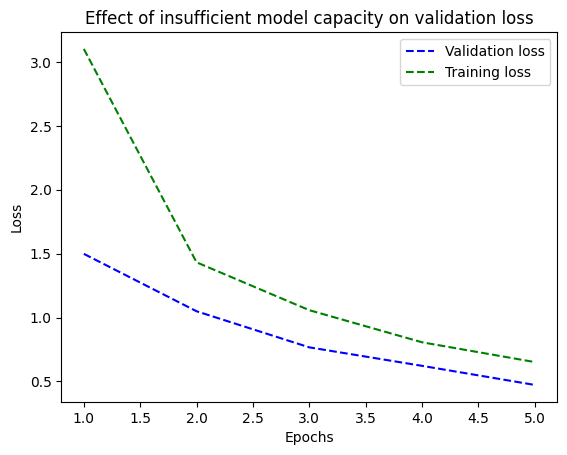

In [37]:
val_loss=model_history.history['val_loss']
training_loss=model_history.history['loss']
# loss=model.history['loss
epochs = range(1, ep+1)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.plot(epochs, training_loss, "g--",
         label="Training loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

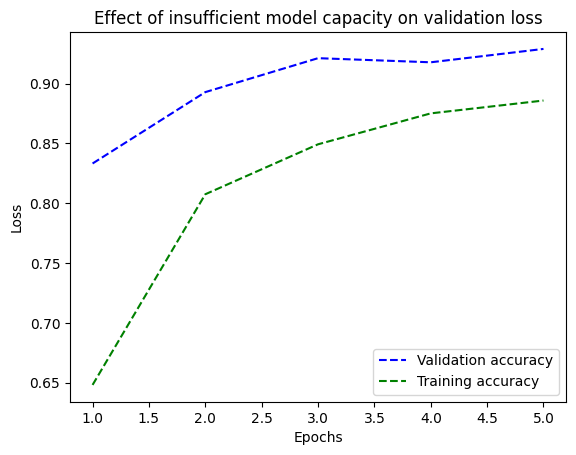

In [38]:
val_loss=model_history.history['val_accuracy']
training_loss=model_history.history['accuracy']
# loss=model.history['loss
epochs = range(1, ep+1)
plt.plot(epochs, val_loss, "b--",
         label="Validation accuracy")
plt.plot(epochs, training_loss, "g--",
         label="Training accuracy")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()